# Dados aluno:

Nome: Bruno Raphaell Alves de Matos

Matrícula: 20179142830

# Fuzzificação:

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings

warnings.filterwarnings('ignore')  # Ignora os avisos de warnings

## Definindo as variáveis de entrada do problema.

In [13]:
def gerar_grafico(sinal, label = 0):
    sinal.view()
    labels = ['Baixo', 'Médio', 'Alto']
    plt.xticks(np.arange(0, 120, 10))
    
    if label == 1:
        plt.title('Fluxo de carros das vias 1 e 3')
    else:
        plt.title('Fluxo de carros das vias 2 e 4')

    plt.xlabel('Fluxo de carros (carros/min)')

    plt.grid(color='green', linestyle = '--', linewidth = 0.5)
    plt.legend(labels, bbox_to_anchor=(0,-0.3,1,0.2), loc='lower center', mode='expand', ncol=3)
    plt.show()

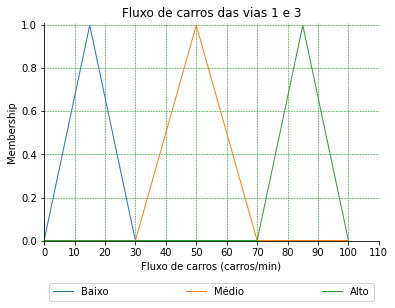

In [14]:
# 1. Sinais 1 e 3:

sinal1 = ctrl.Antecedent(np.arange(0, 101, 1), 'sinal1')

sinal1['baixo'] = fuzz.trimf(sinal1.universe, [0, 15, 30])
sinal1['medio'] = fuzz.trimf(sinal1.universe, [30, 50, 70])
sinal1['alto'] = fuzz.trimf(sinal1.universe, [70, 85, 100])

gerar_grafico(sinal1, label=1)

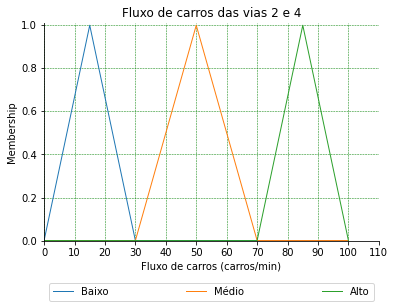

In [15]:
# 2. Sinais 2 e 4:

sinal2 = ctrl.Antecedent(np.arange(0, 101, 1), 'sinal2')

sinal2['baixo'] = fuzz.trimf(sinal2.universe, [0, 15, 30])
sinal2['medio'] = fuzz.trimf(sinal2.universe, [30, 50, 70])
sinal2['alto'] = fuzz.trimf(sinal2.universe, [70, 85, 100])

gerar_grafico(sinal2, label=2)

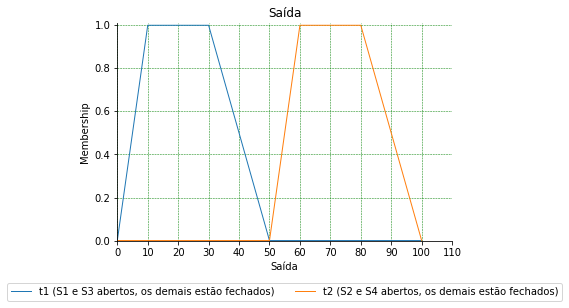

In [16]:
# Saída, Caso seja:
# t1 = S1 e S3 abertos, os demais estão fechados
# t2 = S2 e S4 abertos, os demais estão fechados

saida = ctrl.Consequent(np.arange(0, 101, 1), 'saida')

saida['t1'] = fuzz.trapmf(saida.universe, [0, 10, 30, 50])
saida['t2'] = fuzz.trapmf(saida.universe, [50, 60, 80, 100])

saida.view()
plt.xticks([i for i in np.arange(0, 120, 10)])
plt.title('Saída')
plt.xlabel('Saída')
plt.grid(color='green', linestyle = '--', linewidth = 0.5)
plt.legend(['t1 (S1 e S3 abertos, os demais estão fechados)', 't2 (S2 e S4 abertos, os demais estão fechados)'], bbox_to_anchor=(0,-0.3,1,0.2), loc='lower center', ncol=2)
plt.show()

# Inferência

min -> And

Max -> OR

## Regras: 

In [17]:
regra1 = ctrl.Rule(sinal1['baixo']  & sinal2['medio'], saida['t2'])
regra2 = ctrl.Rule(sinal1['baixo']  & sinal2['alto'], saida['t2'])
regra3 = ctrl.Rule(sinal1['medio']  & sinal2['baixo'], saida['t1'])
regra4 = ctrl.Rule(sinal1['medio']  & sinal2['medio'], saida['t1'])
regra5 = ctrl.Rule(sinal1['medio']  & sinal2['alto'], saida['t2'])
regra6 = ctrl.Rule(sinal1['alto']   & sinal2['baixo'], saida['t1'])
regra7 = ctrl.Rule(sinal1['alto']   & sinal2['medio'], saida['t1'])
regra8 = ctrl.Rule(sinal1['alto']   & sinal2['alto'], saida['t2'])
regra1 = ctrl.Rule(sinal1['baixo']  & sinal2['baixo'], saida['t1'])

# Desfuzzificação

In [18]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [19]:
def desfuzzificação(sistema, sinal1, sinal2):
    sistema.input['sinal1'] = sinal1
    sistema.input['sinal2'] = sinal2

    sistema.compute()

    if sistema.output['saida'] <= 50:
        print(f"S1 e S3 abertos, os demais estão fechados")
    else:
        print('S2 e S4 abertos, os demais estão fechados')
        
    saida.view(sim=sistema)
    plt.xticks([i for i in np.arange(0, 120, 10)])
    plt.title('Saída')
    plt.xlabel('Saída')
    plt.grid(color='green', linestyle = '--', linewidth = 0.5)
    plt.legend(['t1 (S1 e S3 abertos, os demais estão fechados)', 't2 (S2 e S4 abertos, os demais estão fechados)'], bbox_to_anchor=(0,-0.3,1,0.2), loc='lower center', ncol=2)
    plt.show()

## Teste 1:

Quantidade de carros por minuto em cada via:

- Via 1A: 24
- Via 1B: 22
- Via 2A: 12
- Via 2B: 10


S1 e S3 abertos, os demais estão fechados


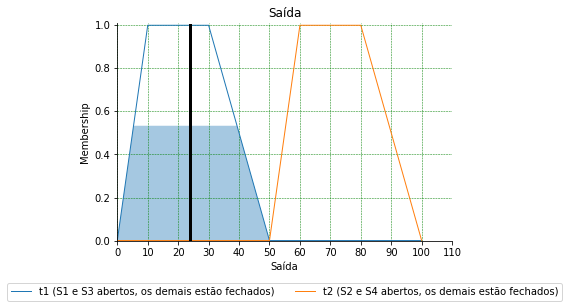

In [20]:
fluxo_veiculos = {'1A': 24, '1B': 22, '2A': 12, '2B': 10}

desfuzzificação(sistema, fluxo_veiculos['1A'] + fluxo_veiculos['1B'], fluxo_veiculos['2A'] + fluxo_veiculos['2B'])

## Teste 2:

Quantidade de carros por minuto em cada via:

- Via 1A: 50
- Via 1B: 25
- Via 2A: 40
- Via 2B: 33

S2 e S4 abertos, os demais estão fechados


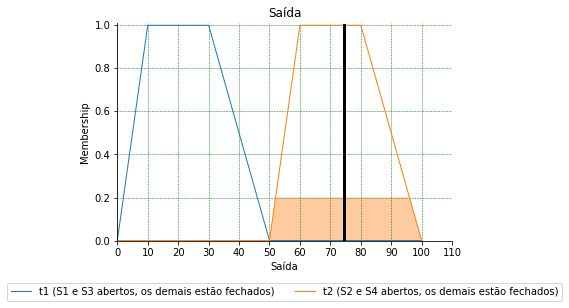

In [21]:
fluxo_veiculos = {'1A': 50, '1B': 25, '2A': 40, '2B': 33}

desfuzzificação(sistema, fluxo_veiculos['1A'] + fluxo_veiculos['1B'], fluxo_veiculos['2A'] + fluxo_veiculos['2B'])

## Teste 3:

Quantidade de carros por minuto em cada via:

- Via 1A: 10
- Via 1B: 31
- Via 2A: 37
- Via 2B: 39

S2 e S4 abertos, os demais estão fechados


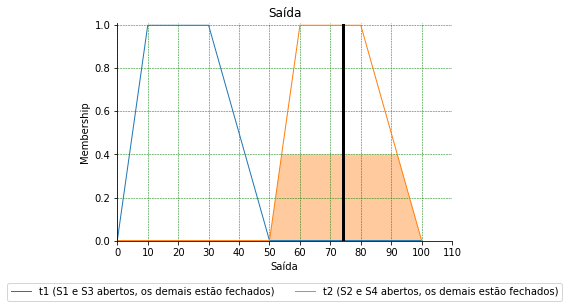

In [22]:
fluxo_veiculos = {'1A': 10, '1B': 31, '2A': 37, '2B': 39}

desfuzzificação(sistema, fluxo_veiculos['1A'] + fluxo_veiculos['1B'], fluxo_veiculos['2A'] + fluxo_veiculos['2B'])